# 3 Mach-Zehnder Inteferometer


I this part of the experiment we used a modulated MZ interferometer (appartus seen below) to find the spectra of SLD and FP laser by measuring the contrast of interference fringes as the length of the delay line was change. Where the contrast was measured by: 

$$C(x) = \cfrac{I_\mbox{max}-I_\mbox{min}}{I_\mbox{max} + I_\mbox{min}} = \cfrac{\mbox{peak-to-peak}}{\mbox{2 x mean}}$$

The expression for the aboslute value of contrast (cannot find it's phase) is: 

$$C(\delta) =  abs( \cfrac{2\sqrt{I_1I_2}FT[S(\nu -\nu_0)]}{I_1 + I_2} ) $$

Therefore, the spectrum of the beams is proportional to the Fourier transform of the contrast (assuming intensities stay the same).


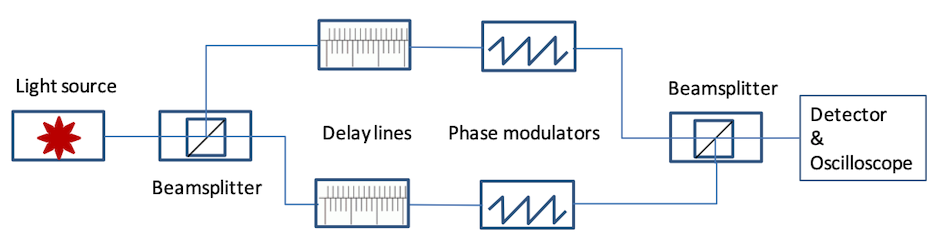

Pandas was used to process the excel document and scipy was used to carry out the FFT. within the `fft` module there is regular mode `fft`, and there is the a mode for real inputs `rfft`. Real inputs will always be symmetric about 0 so `rfft` saves on compute by only calculating value for x>= 0; although in this case compute was not the limiting factor, it is good practice.

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
%matplotlib inline

## Super Luminescent Diode (SLD) spectrum 

First, we measured the SLD spectrum. It is known that as the SLD has a wide spectrum that the coherence length, and therefore the length of delay line where strong fringes are seen, is small. For this reason is was more important to have lots of measurements in a small window as opposed to the other way around. So, 120 measurements were taken either side of the maximum 'zero-point' in increments of 0.01mm

In [17]:
# import the data from excel spreadsheet using pandas 
SLD_df = pd.read_excel('data/SLD_new.xlsx', usecols='A,D', index_col=0)

SLD_df = SLD_df.sort_index()

SLD_df

,contrast
airgap,
1.18,0.010112
1.19,0.010112
1.20,0.014607
1.21,0.019101
1.22,0.029213
...,...
3.02,0.019101
3.03,0.019101
3.04,0.014607


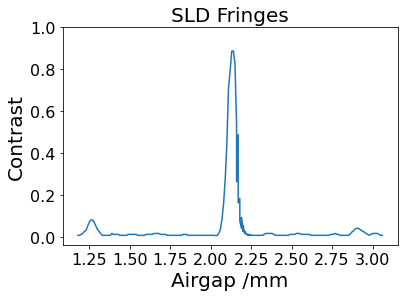

In [18]:
#SLD_df.plot(title='SLD Fringes', legend=False, ylabel='Contrast')

plt.plot(SLD_df.index.values, SLD_df['contrast'])

plt.title('SLD Fringes', fontsize=20)
plt.ylabel('Contrast', fontsize=20)
plt.xlabel('Airgap /mm', fontsize=20)
plt.xticks(np.arange(1.25, 3.01, step=0.25),fontsize=16)
plt.yticks(np.arange(0, 1.1, step=0.2),fontsize=16)
#plt.savefig('photos/SLD_fringes.png', dpi='figure', bbox_inches="tight")

plt.show()

In [19]:
# first we must find out some stuff about our data 

SLD_N = len(SLD_df)

SLD_SAMPLE_RATE = 1e5 # measures per metre

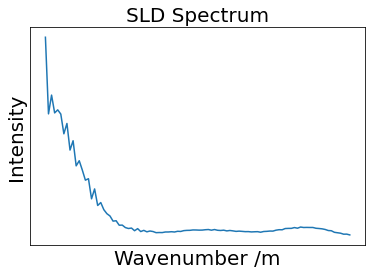

In [20]:
yf = rfft(list(SLD_df['contrast']))
xf = rfftfreq(SLD_N, 1/SLD_SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.title('SLD Spectrum', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xlabel('Wavenumber /m', fontsize=20)
plt.xticks([], fontsize=16)
plt.yticks([], fontsize=16)
#plt.savefig('photos/SLD_spectrum1.png', dpi='figure', bbox_inches="tight")

plt.show()

### Removing DC offset 

The spike at the zero point is due to the Fourier transform picking up on a signal with zero frequency i.e. noise. We can remove by omitting the first point of the FFT. (i.e. using `xf[1:]` and `yf[:1]` in python)

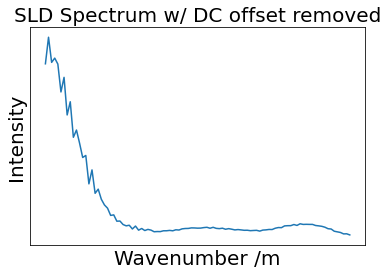

In [21]:
yf_corrected = rfft(list(SLD_df['contrast'])) 

plt.plot(xf[1:], np.abs(yf[1:]))
plt.title('SLD Spectrum w/ DC offset removed', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xlabel('Wavenumber /m', fontsize=20)
plt.xticks([],fontsize=16)
plt.yticks([],fontsize=16)
#plt.savefig('photos/SLD_spectrum2.png', dpi='figure', bbox_inches="tight")

plt.show()

The spectrum of SLD is very broad. This is expected as in real space the fringes only occur over a very short range. Values for the wavenumber would have been calculated if more time was available

## Fabry-Perot (FP) Laser

An FP laser is the opposite of an SLD as it has a tight spectrum therefore has a long coherence length in real space. For this reason it was more important to measure over a large range with larger increments between measurements. So, 150 measurements were taken either side of the maximum 'zero-point' in increments of 0.04mm

In [22]:
FP_df = pd.read_excel('data/Fabry-Perot_contrast.xlsx', usecols='A:D', index_col=0)

FP_df = FP_df.sort_index()

FP_df

,P2P/V,Mean/V,Contrast
Airgap/mm,,,
0.20,0.43,2.41,0.089212
0.24,0.43,2.42,0.088843
0.28,0.39,2.42,0.080579
0.32,0.39,2.36,0.082627
0.36,0.34,2.43,0.069959
...,...,...,...
8.08,0.87,2.42,0.179752
8.12,0.74,2.41,0.153527
8.16,0.61,2.43,0.125514


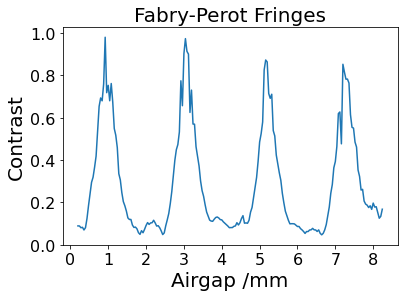

In [23]:
# FP_df.plot(y='Contrast', title='Fabry-Perot Fringes', legend=False, ylabel='Contrast') # need to only plot contrast

plt.plot(FP_df.index.values, FP_df['Contrast'])
plt.title('Fabry-Perot Fringes', fontsize=20)
plt.ylabel('Contrast', fontsize=20)
plt.xlabel('Airgap /mm', fontsize=20)
plt.xticks(np.arange(0, 8.01, step=1),fontsize=16)
plt.yticks(np.arange(0, 1.1, step=0.2),fontsize=16)
#plt.savefig('photos/FP_fringes.png', dpi='figure', bbox_inches="tight")

plt.show()

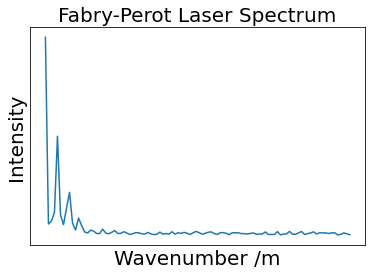

In [24]:
FP_N = len(FP_df)
FP_SAMPLE_RATE = 0.04 # mm

yf = rfft(list(FP_df['Contrast']))
xf = rfftfreq(FP_N, 1/FP_SAMPLE_RATE)

plt.plot(xf,np.abs(yf))
plt.title('Fabry-Perot Laser Spectrum', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xlabel('Wavenumber /m', fontsize=20)
plt.xticks([],fontsize=16)
plt.yticks([],fontsize=16)
#plt.savefig('photos/FP_spectrum1.png', dpi='figure', bbox_inches="tight")

plt.show()

The same method is use for the Fabry-Perot laser to remove the DC offset.

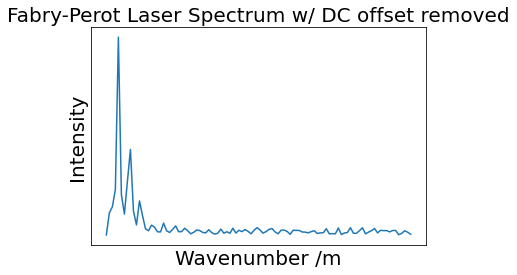

In [25]:
yf_corrected = rfft(list(FP_df['Contrast']-FP_df['Contrast'].mean()))

plt.plot(xf, np.abs(yf_corrected))
plt.title('Fabry-Perot Laser Spectrum w/ DC offset removed', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xlabel('Wavenumber /m', fontsize=20)
plt.xticks([],fontsize=16)
plt.yticks([],fontsize=16)
#plt.savefig('photos/FP_spectrum2.png', dpi='figure', bbox_inches="tight")

plt.show()